In [1]:
import numpy as np
import pandas as pd
import requests
import urllib.request
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Read the CSV and Perform Basic Data Cleaning

In [3]:
# https://github.com/Hecgithub/House_Price_Prediction/blob/03_Data_Gathering_and_Cleaning/03_Code_and_Data/03_Data_Cleaning/data/For_ML/ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv

columns = [
    "Lat","Lng","Price","Bedrooms","Bathrooms","constructedArea","zipCode",
    "hasGarage","hasPool","hasCooling","hasView","yearBuilt","stories","parkingSpaces",
    "annualHOI","schoolElemRating","schoolElemDist","schoolMidRating","schoolMidDist",
    "schoolHighRating","schoolHighDist","priceIncreased","priceDiff","days","lotAreaSQFT"
]

target = ["Price"]

In [4]:
# reading in the data set from the github 
url = 'https://raw.githubusercontent.com/Hecgithub/House_Price_Prediction/03_Data_Gathering_and_Cleaning/03_Code_and_Data/03_Data_Cleaning/data/For_ML/ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv'

urllib.request.urlretrieve(url, 'ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv')

('ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv',
 <http.client.HTTPMessage at 0x2ec19d3b388>)

In [5]:
# There are 25 columns and 4499 rows 
df = pd.read_csv('ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv')
print(df.shape)

(4499, 25)


In [6]:
# Peek at the dateset
df.head()

,Lat,Lng,Price,Bedrooms,Bathrooms,constructedArea,zipCode,hasGarage,hasPool,hasCooling,...,schoolElemRating,schoolElemDist,schoolMidRating,schoolMidDist,schoolHighRating,schoolHighDist,priceIncreased,priceDiff,days,lotAreaSQFT
0,29.603600,-95.485405,276000,3,2,3612,77489,1,0,1,...,6,0.5,3,1.3,2,1.1,1,31000,1213,8764.272
1,29.600388,-95.488210,220000,3,2,1270,77489,1,0,1,...,6,0.3,3,1.3,2,1.0,1,65100,503,7884.360
2,29.595436,-95.485880,230000,4,2,1765,77489,1,0,1,...,6,0.3,3,1.0,2,0.6,1,115275,5140,7148.196
3,29.597320,-95.492690,225000,3,2,1444,77489,1,0,1,...,6,0.1,3,1.4,2,1.0,1,56000,824,7731.900
4,29.592060,-95.489050,246500,3,2,1738,77489,1,0,1,...,6,0.3,3,1.0,2,0.6,1,41500,6810,8062.956


In [7]:
# Checking the features of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lat               4499 non-null   float64
 1   Lng               4499 non-null   float64
 2   Price             4499 non-null   int64  
 3   Bedrooms          4499 non-null   int64  
 4   Bathrooms         4499 non-null   int64  
 5   constructedArea   4499 non-null   int64  
 6   zipCode           4499 non-null   int64  
 7   hasGarage         4499 non-null   int64  
 8   hasPool           4499 non-null   int64  
 9   hasCooling        4499 non-null   int64  
 10  hasView           4499 non-null   int64  
 11  yearBuilt         4499 non-null   int64  
 12  stories           4499 non-null   int64  
 13  parkingSpaces     4499 non-null   int64  
 14  annualHOI         4499 non-null   int64  
 15  schoolElemRating  4499 non-null   int64  
 16  schoolElemDist    4499 non-null   float64


In [8]:
# Find columns with missing values and their percent missing
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])
miss_val


,MissvalCount
Lat,0
parkingSpaces,0
days,0
priceDiff,0
priceIncreased,0
schoolHighDist,0
schoolHighRating,0
schoolMidDist,0
schoolMidRating,0
schoolElemDist,0


In [9]:
# drop rows with any missing values
df.dropna(inplace=True)

In [10]:
# Check the dimension of the dataset
df.shape

(4499, 25)

Data set is clean and there is still 25 features and 4499 observations 

# Explore Data

C:\Users\HecTi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Price', ylabel='Density'>

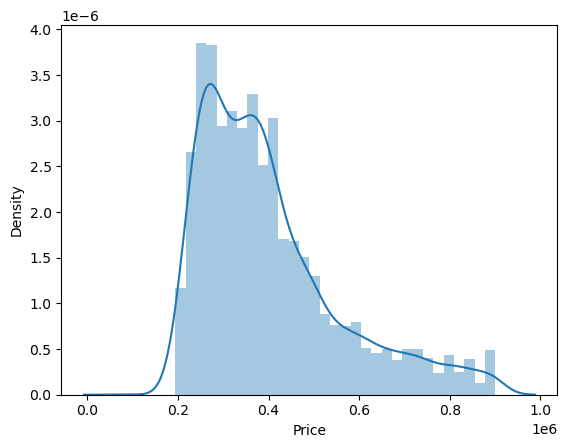

In [11]:
# Check distribution of target variable which is Price
sns.distplot(df.Price)

The Price distribution is slightly skewed to the right. 

C:\Users\HecTi\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Price', ylabel='Density'>

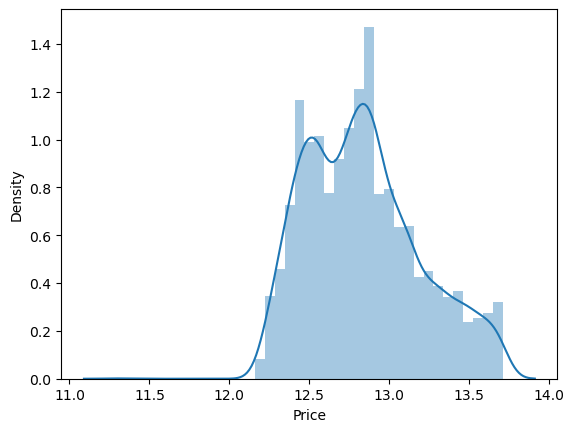

In [12]:
# Transform the target variable 
sns.distplot(np.log(df.Price))

The data is now more normally distributed. 

In [13]:
df['LogOfPrice'] = np.log(df.Price)
df.drop(["Price"], axis=1, inplace=True)

In [14]:
# Review the skewness of each feature
df.skew().sort_values(ascending=False)

lotAreaSQFT         10.877670
hasView              9.528929
hasPool              3.625326
zipCode              3.038346
days                 2.031827
schoolElemDist       1.765458
schoolHighDist       1.230334
annualHOI            1.211468
constructedArea      1.210563
stories              0.898205
Bedrooms             0.840323
schoolMidDist        0.830383
schoolHighRating     0.626184
schoolElemRating     0.546457
schoolMidRating      0.510015
LogOfPrice           0.471178
Lat                  0.295324
priceIncreased       0.269677
Bathrooms            0.269386
Lng                  0.179166
parkingSpaces       -0.129342
yearBuilt           -0.619684
hasGarage           -1.802039
hasCooling          -4.553775
priceDiff          -66.816302
dtype: float64

Values that are closer to zero are less skewed. 

# Train- Test Split dataset


In [15]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

In [16]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

Spliting the data set, will use random sampling with 75/25 train-test split. 

# Modeling

## Linear Regression 

In [17]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# given our model and our fit, predict y_values using X_test set
yr_hat = lr.predict(X_test)

In [19]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)

Accuracy:  0.9633032574100235


In [20]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.8566111  0.95336821 0.96140603 0.9651526  0.95384005]
R2:  0.9380755984223363


## Random Forest

In [21]:
#rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) # gets the parameters for the rfr model
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.9932550230884505


In [22]:
# Random forest determined feature importances
rfr.feature_importances_

array([2.29425464e-04, 2.39976403e-04, 2.30128977e-05, 1.04261366e-04,
       6.95131494e-04, 1.43825440e-04, 2.24571381e-05, 1.78577102e-06,
       1.81783839e-07, 3.62142876e-06, 6.37510814e-04, 8.45703953e-05,
       4.27894590e-05, 9.92052367e-01, 3.23030678e-04, 1.69069280e-04,
       5.91486933e-05, 8.11179217e-05, 1.36212613e-04, 3.10113620e-04,
       9.77811435e-06, 3.64575036e-03, 2.15914874e-04, 7.68946533e-04])

## Plotting Feature Importance 

In [23]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['annualHOI', 'priceDiff', 'lotAreaSQFT', 'constructedArea', 'yearBuilt', 'schoolElemRating', 'schoolHighDist', 'Lng', 'Lat', 'days', 'schoolElemDist', 'zipCode', 'schoolHighRating', 'Bathrooms', 'stories']


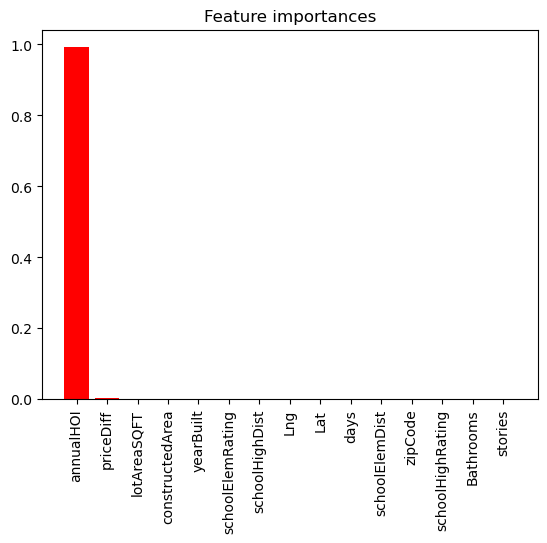

In [24]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

Annual HOI was the hiighest determinig factor for price. 